### Задача 6. Определение типа стекла
Набор данных: [Glass Identification Dataset](https://archive.ics.uci.edu/ml/datasets/glass+identification)

         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
ID                                                               
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Logistic Regression - Accuracy: 0.7209
Logistic Regression - Confusion Matrix:
[[ 9  2  0  0  0  0]
 [ 3 10  0  0  0  1]
 [ 1  2  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0  8]]

SVM - Accuracy: 0.7209
SVM - Confusion Matrix:
[[11  0  0  0  0  0]
 [ 4 10  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  1  1  0]
 [ 0  1  0  0  0  7]]

K-Nearest Neighbors - Accuracy: 0.6977
K-Nearest Neighbors - Confusion Matrix:
[[10  1  0  0  0  0]
 [ 5  8  0  1  0  0]
 [ 1  2  0  0  0  0]
 [ 0  2  0  1 

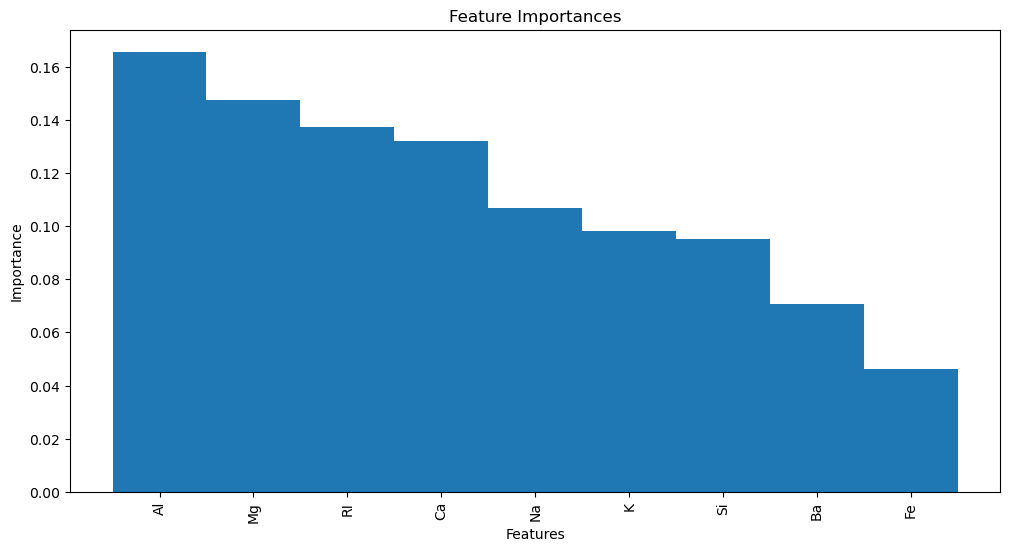

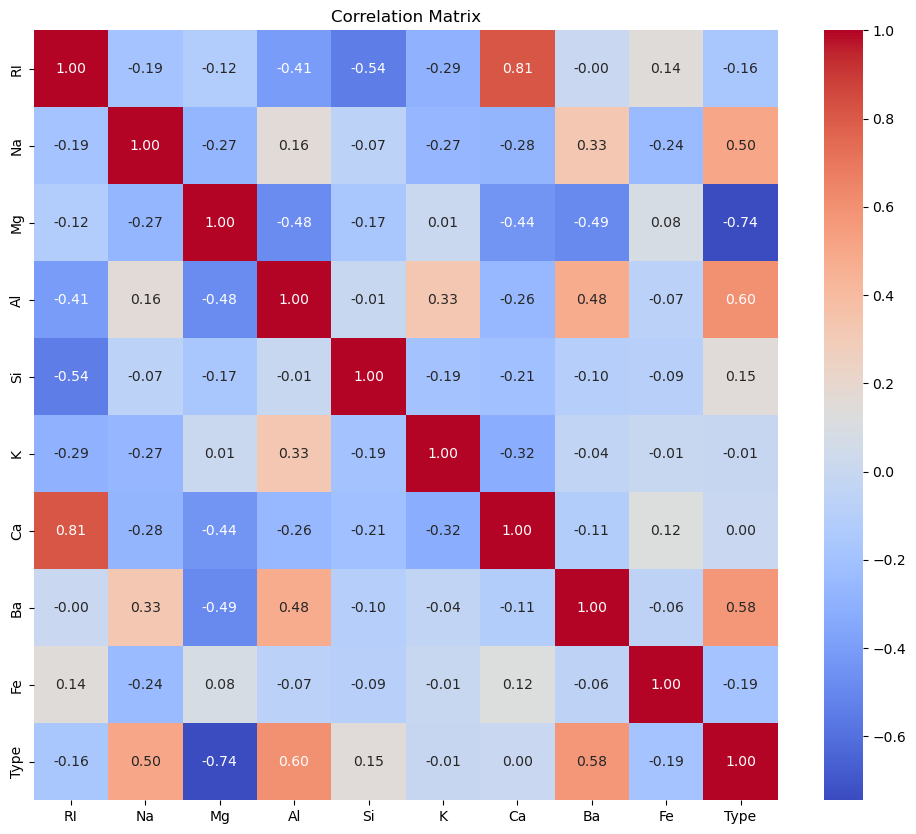

In [1]:
import pandas as pd
import numpy as np

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
columns = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
glass_data = pd.read_csv(dataset_url, names=columns, index_col="ID")

print(glass_data.head())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_features = glass_data.drop('Type', axis=1)
y_target = glass_data['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

classifiers = {
    "Logistic Regression": logistic_model,
    "SVM": svm_model,
    "K-Nearest Neighbors": knn_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

for classifier_name, model in classifiers.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f"{classifier_name} - Accuracy: {accuracy:.4f}")
    print(f"{classifier_name} - Confusion Matrix:\n{confusion_mat}\n")

from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2)
grid_search_svm.fit(X_train, y_train)
print(f"Best parameters from GridSearchCV: {grid_search_svm.best_params_}")
print(f"Best score from GridSearchCV: {grid_search_svm.best_score_}")

from sklearn.model_selection import RandomizedSearchCV

param_dist_svm = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

random_search_svm = RandomizedSearchCV(SVC(), param_dist_svm, n_iter=50, refit=True, verbose=2, random_state=42)
random_search_svm.fit(X_train, y_train)
print(f"Best parameters from RandomizedSearchCV: {random_search_svm.best_params_}")
print(f"Best score from RandomizedSearchCV: {random_search_svm.best_score_}")

import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_features.shape[1]), feature_importances[sorted_indices], align="center", width=1.0, edgecolor='none')
plt.xticks(range(X_features.shape[1]), [X_features.columns[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

import seaborn as sns

correlation_matrix = glass_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()